### Punto C

Simule 30 experimentos de 100 corridas cada una y calcule:

- El tiempo promedio de finalización del proyecto y el IC. Con el 99% de probabilidad (2,57).
- Calcule el porcentaje de criticidad tienen los diferentes accesos.
- Grafique un histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas. Y otro teniendo en cuenta los promedios de los 30 experimentos.


In [49]:
import numpy as np
import seaborn as sns

In [50]:
class Actividad():
    """
    Modela una actividad dentro del modelo de simulacion
    con una descripcion, una duracion minima, una duracion maxima
    y una duracion real establecida por una distribucion uniforme.
    """
    def __init__(self, nombre, duracionMin, duracionMax):
        self.nombre = nombre
        self.duracion_minima = duracionMin
        self.duracion_maxima = duracionMax
    
    def getDuracionEstimada(self):
        return round(np.random.uniform(self.duracion_minima, self.duracion_maxima))

In [51]:
class Acceso():
    """
    Esta clase representa un conjunto de actividades agrupadas.
    Dependiendo el tipo de acceso se crean una cantidad de actividades acorde
    """
    def __init__(self,tipo, ejercicio):
        self.lista_actividades = []
        self.nombre = ""
        if tipo == 'Superior':
            self.nombre = 'Superior'
            if ejercicio == 1:
                #Actividades A,B,C y D
                self.lista_actividades.append(Actividad('Romper huevos', 2, 4))
                self.lista_actividades.append(Actividad('Revolver huevos', 3, 6))
                self.lista_actividades.append(Actividad('Cocinar huevos', 2, 5))
                self.lista_actividades.append(Actividad('Cortar panes', 3, 6))
            else:
                #Actividades A,B,C 
                self.lista_actividades.append(Actividad('Retirar alfombras', 1,5))
                self.lista_actividades.append(Actividad('Aplicar detergente', 1,3))
                self.lista_actividades.append(Actividad('Enjuagar alfombras', 1,3))
       
        elif tipo == 'Medio':
            self.nombre = 'Medio'
            #Actividades D y E
            if ejercicio == 1:
                self.lista_actividades.append(Actividad('Cortar panes', 3, 6))
                self.lista_actividades.append(Actividad('Preparar tostadas', 2, 5))
            else:
                #A D E F
                self.lista_actividades.append(Actividad('Retirar alfombras', 1,5))
                self.lista_actividades.append(Actividad('Mojar vehículo',1, 6))
                self.lista_actividades.append(Actividad('Aplicar detergente', 6,12))
                self.lista_actividades.append(Actividad('Enjuagar vehículo', 5,10))

        else:
            self.nombre = 'Inferior'
            if ejercicio == 1:
                #Inferior. Involucra las actividades F y G
                self.lista_actividades.append(Actividad('Preparar bebidas calientes (té, café)', 4, 8))
                self.lista_actividades.append(Actividad('Preparar bebidas frías (jugos, yogur)', 3, 7))
            else:
                #F y G
                self.lista_actividades.append(Actividad('Enjuagar vehículo', 5,10))
                self.lista_actividades.append(Actividad('Aspirar interiores', 10,15))
                
            
    def getDuracionAcceso(self):
        return sum(actividad.getDuracionEstimada() for actividad in self.lista_actividades)

In [52]:
class Proyecto():
    """
    Modela un proyecto con 3 accesos
    """
    def __init__(self,ejercicio):
        self.lista_accesos = []
        self.lista_accesos.append(Acceso('Superior',ejercicio))
        self.lista_accesos.append(Acceso('Medio',ejercicio))
        self.lista_accesos.append(Acceso('Inferior',ejercicio))
    
    def getDuracionProyecto(self):
        return sum(acceso.getDuracionAcceso() for acceso in self.lista_accesos)
        
    def getCaminoCriticoProyecto(self): #devuelve el nombre del acceso con el camino critico para el proyecto
        return max((acceso.getDuracionAcceso(), acceso.nombre) for acceso in p.lista_accesos)[1]

In [53]:
def intervalo_confianza(duraciones_totales):
    media = np.mean(duraciones_totales)
    valor_z = 2.57
    desvio = np.std(duraciones_totales)
    n = len(duraciones_totales)
    
    ext_inferior = media - (valor_z * (desvio/(n ** 0.5)))
    ext_superior = media + (valor_z * (desvio/(n ** 0.5)))
    return ext_inferior, ext_superior

### RESPUESTAS simulacion 1

In [70]:
cant_experimentos = 30
cant_corridas = 100
duracion_promedio_por_experimento = 0
duraciones_totales = [] 
duraciones_promedio_por_experimento = []
contador_caminos_criticos = {
    "Superior":0,
    "Medio":0,
    "Inferior":0
}
for i in range(cant_experimentos):
    duracion_promedio_por_experimento = 0
    for j in range(cant_corridas):
        p = Proyecto(1)
        duraciones_totales.append(p.getDuracionProyecto()) 
        duracion_promedio_por_experimento += p.getDuracionProyecto()
        cc = p.getCaminoCriticoProyecto()
        contador_caminos_criticos[cc] = contador_caminos_criticos[cc] + 1
    duraciones_promedio_por_experimento.append(duracion_promedio_por_experimento)

**Tiempo promedio de finalizacion del proyecto luego de 30 experimentos con 100 corridas**

In [76]:
sum(duracion for duracion in duraciones_totales)/3000

34.512

**Intervalo de Confianza luego de 30 experimentos con 100 corridas**

In [77]:
intervalo_confianza(duraciones_totales)

(34.37882327118399, 34.64517672881601)

**Porcentaje de Criticidades**

In [78]:
contador_caminos_criticos

{'Inferior': 66, 'Medio': 0, 'Superior': 2934}

**Histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas**

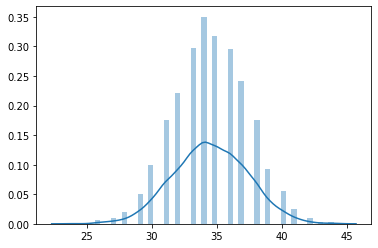

In [79]:
sns.distplot(duraciones_totales)

**Histograma con los promedios de los 30 experimentos**

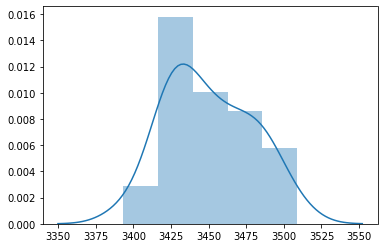

In [80]:
sns.distplot(duraciones_promedio_por_experimento)

### RESPUESTAS simulacion 2

In [81]:
cant_experimentos = 30
cant_corridas = 100
duracion_promedio_por_experimento = 0
duraciones_totales = [] 
duraciones_promedio_por_experimento = []
contador_caminos_criticos = {
    "Superior":0,
    "Medio":0,
    "Inferior":0
}
for i in range(cant_experimentos):
    duracion_promedio_por_experimento = 0
    for j in range(cant_corridas):
        p = Proyecto(2)
        duraciones_totales.append(p.getDuracionProyecto()) 
        duracion_promedio_por_experimento += p.getDuracionProyecto()
        cc = p.getCaminoCriticoProyecto()
        contador_caminos_criticos[cc] = contador_caminos_criticos[cc] + 1
    duraciones_promedio_por_experimento.append(duracion_promedio_por_experimento)

**Tiempo promedio de finalizacion del proyecto luego de 30 experimentos con 100 corridas**

In [82]:
sum(duracion for duracion in duraciones_totales)/3000

49.933

**Intervalo de Confianza luego de 30 experimentos con 100 corridas**

In [83]:
intervalo_confianza(duraciones_totales)

(49.74277845813318, 50.12322154186682)

**Porcentaje de Criticidades**

In [84]:
contador_caminos_criticos

{'Inferior': 489, 'Medio': 2511, 'Superior': 0}

**Histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas**

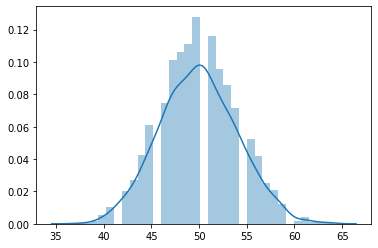

In [85]:
sns.distplot(duraciones_totales)

**Histograma con los promedios de los 30 experimentos**

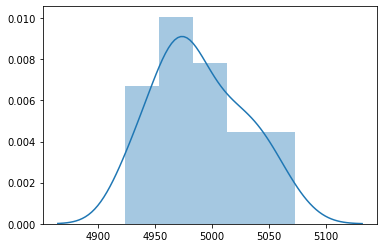

In [86]:
sns.distplot(duraciones_promedio_por_experimento)